In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# Read Six Flags Stock History CSV into DataFrame
start='2013-03-01'
end='2023-03-01'
dataset = pd.read_csv("ADBL(2013-2023).csv")
print(dataset.head())
print()

  Symbol        Date  Open  High  Low  Close Percent Change  Volume
0   ADBL  2023-03-01   NaN   NaN  NaN    NaN            NaN     NaN
1   ADBL  2023-02-28   NaN   NaN  NaN    NaN            NaN     NaN
2   ADBL  2023-02-27   NaN   NaN  NaN    NaN            NaN     NaN
3   ADBL  2023-02-26   NaN   NaN  NaN    NaN            NaN     NaN
4   ADBL  2023-02-25   NaN   NaN  NaN    NaN            NaN     NaN



In [4]:
print(dataset.tail())
print()

     Symbol        Date   Open   High    Low  Close Percent Change  Volume
2280   ADBL  2013-03-03  250.0  255.0  248.0  250.0           0.00  7283.0
2281   ADBL  2013-02-28  250.0  252.0  249.0  250.0           0.00  9283.0
2282   ADBL  2013-02-27  250.0  250.0  245.0  250.0           0.00  3682.0
2283   ADBL  2013-02-26  255.0  260.0  245.0  250.0          -1.96  2202.0
2284   ADBL  2013-02-25  250.0  255.0  246.0  255.0           2.00  2352.0



In [5]:
# Change Data column into Python Datetime
dataset["Date"] = pd.to_datetime(dataset.Date, format="%Y-%m-%d")
dataset.index = dataset["Date"]

In [8]:
# Create new dataset with only Date and Close price
data = dataset.sort_index(ascending=True, axis=0)
new_dataset = pd.DataFrame(index=range(0, len(dataset)), columns=["Date", "Close", "Volume"])
for i in range(0, len(data)):
    new_dataset["Date"][i] = data["Date"][i]
    new_dataset["Close"][i] = data["Close"][i]
    new_dataset["Volume"][i] = data["Volume"][i]
    

In [9]:
new_dataset.head()

,Date,Close,Volume
0,2013-02-25 00:00:00,255.0,2352.0
1,2013-02-26 00:00:00,250.0,2202.0
2,2013-02-27 00:00:00,250.0,3682.0
3,2013-02-28 00:00:00,250.0,9283.0
4,2013-03-03 00:00:00,250.0,7283.0


In [10]:
# Change dataframe index identifier to data values
new_dataset.index = new_dataset.Date
new_dataset.drop("Date", axis=1, inplace=True)

In [12]:
dataset.shape

(2285, 8)

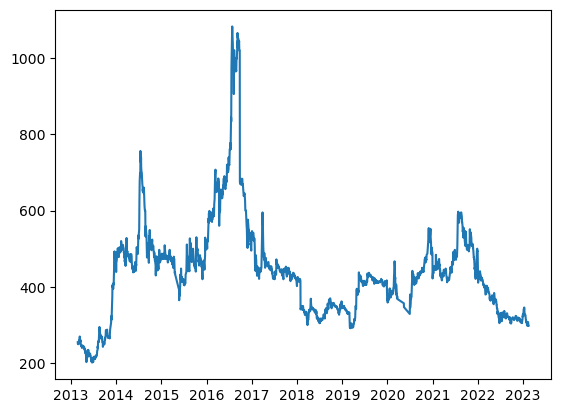

In [17]:
plt.plot(dataset.Close)

In [18]:
dataset

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
Date,,,,,,,,
2023-03-01,ADBL,2023-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28,ADBL,2023-02-28,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-27,ADBL,2023-02-27,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-26,ADBL,2023-02-26,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-25,ADBL,2023-02-25,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2013-03-03,ADBL,2013-03-03,250.0,255.0,248.0,250.0,0.00,7283.0
2013-02-28,ADBL,2013-02-28,250.0,252.0,249.0,250.0,0.00,9283.0
2013-02-27,ADBL,2013-02-27,250.0,250.0,245.0,250.0,0.00,3682.0


In [22]:
ma100=dataset.Close.rolling(100).mean()
ma100

Date
2023-03-01       NaN
2023-02-28       NaN
2023-02-27       NaN
2023-02-26       NaN
2023-02-25       NaN
               ...  
2013-03-03    227.28
2013-02-28    227.56
2013-02-27    227.86
2013-02-26    228.17
2013-02-25    228.52
Name: Close, Length: 2285, dtype: float64

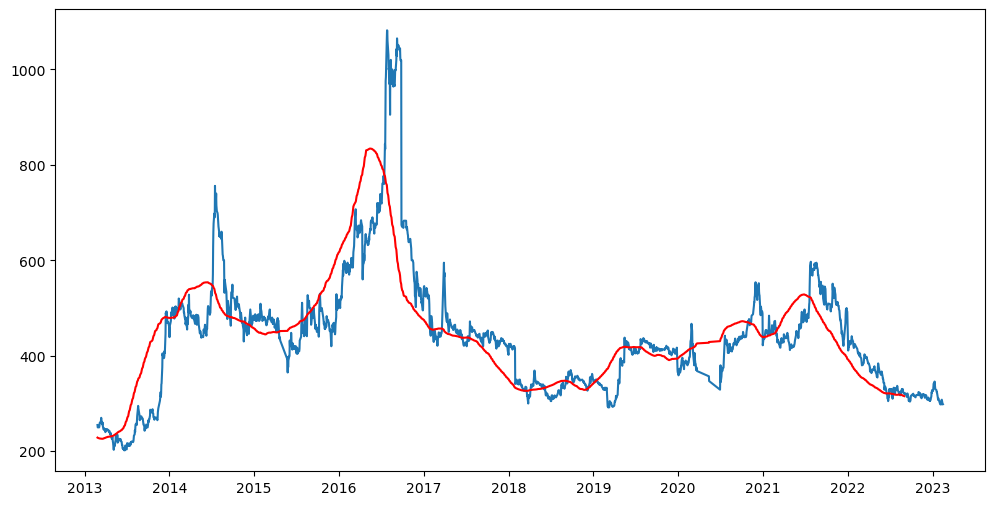

In [23]:
plt.figure(figsize=(12,6))
plt.plot(dataset.Close)
plt.plot(ma100,'r')



In [24]:
ma200=dataset.Close.rolling(200).mean()
ma200

Date
2023-03-01        NaN
2023-02-28        NaN
2023-02-27        NaN
2023-02-26        NaN
2023-02-25        NaN
               ...   
2013-03-03    273.200
2013-02-28    272.020
2013-02-27    270.850
2013-02-26    269.645
2013-02-25    268.555
Name: Close, Length: 2285, dtype: float64

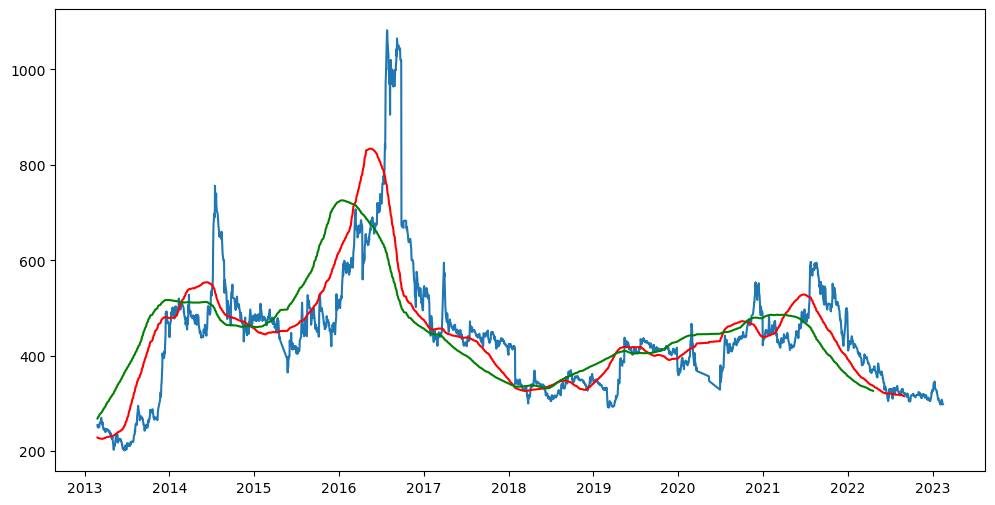

In [26]:
plt.figure(figsize=(12,6))
plt.plot(dataset.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')



In [27]:
dataset.shape

(2285, 8)

In [50]:
# Split training and testing data
data_training = pd.DataFrame(dataset['Close'][0:int(len(dataset)*0.70)])
data_testing = pd.DataFrame(dataset['Close'][(int(len(dataset)*0.70):int(len(dataset)))
print(data_training.shape)
print(data_testing.shape)

SyntaxError: invalid syntax (216683664.py, line 3)

In [51]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(final_dataset)
x_train = []
y_train = []

In [52]:
dataset

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
Date,,,,,,,,
2023-03-01,ADBL,2023-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-28,ADBL,2023-02-28,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-27,ADBL,2023-02-27,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-26,ADBL,2023-02-26,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-25,ADBL,2023-02-25,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2013-03-03,ADBL,2013-03-03,250.0,255.0,248.0,250.0,0.00,7283.0
2013-02-28,ADBL,2013-02-28,250.0,252.0,249.0,250.0,0.00,9283.0
2013-02-27,ADBL,2013-02-27,250.0,250.0,245.0,250.0,0.00,3682.0


In [53]:
for i in range(60, len(train_data)):
    x_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

AttributeError: 'numpy.ndarray' object has no attribute 'append'